In [17]:
#@title Imports

import torch
import torchvision
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from typing import Tuple, Optional
import math
from torch import Tensor
from einops import rearrange
from diffusers import DDPMScheduler, UNet2DModel
from torchvision import datasets, transforms

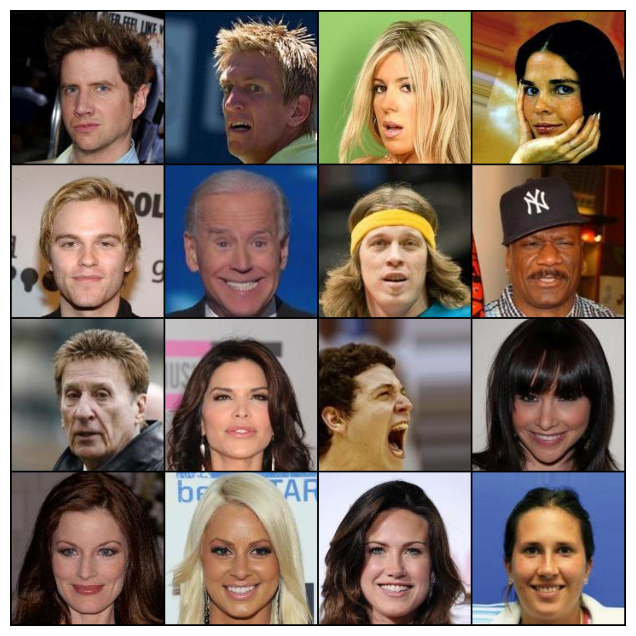

In [ ]:
# Define the path to where you saved the dataset

data_root = r"celeba/"

# Define transforms (resizing, tensor conversion, normalization)
transform = transforms.Compose([
    transforms.CenterCrop(178),  # Original images are 178x218
    # transforms.Resize(64),       # Resize to 64x64 if you want a small version
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normalize to [-1, 1]
])

# Load the dataset
celeba_dataset = datasets.CelebA(
    root=data_root,
    split="train",            # 'train', 'valid', 'test', or 'all'
    target_type="attr",       # 'attr', 'identity', 'bbox', 'landmarks'
    transform=transform,
    download=True            # You've already downloaded it
)

# Create a DataLoader
dataloader = DataLoader(celeba_dataset, batch_size=64, shuffle=True)

# Show an example batch
images, attributes = next(iter(dataloader))
grid = torchvision.utils.make_grid(images[:16], nrow=4, normalize=True)
plt.figure(figsize=(8,8))
plt.imshow(grid.permute(1, 2, 0))  # CHW to HWC
plt.axis('off')
plt.show()  